# Speed up your Pandas Code

- Make your code run 2000 times faster for large & large dataset

In [31]:
import pandas as pd
import numpy as np

# Create out dataset

In [32]:
# Method 1
df = pd.DataFrame()    # Datafram kept in var to make col faster
size = 10_000          # 10K datapoints
df['age'] = np.random.randint(0, 100, size)   # col_name is 'age' :: min, max, size
df['time_in_bed'] = np.random.randint(0, 9, size)
df['pct_sleeping'] = np.random.rand(size)           # Sleeping %
df['favourite_food'] = np.random.choice(['pizza', 'burger', 'ice_creme'], size)
df['dislike_food'] = np.random.choice(['brocoli', 'candy', 'chips'], size)

df.head()

,age,time_in_bed,pct_sleeping,favourite_food,dislike_food
0,35,6,0.803207,ice_creme,chips
1,9,6,0.347198,ice_creme,candy
2,26,8,0.793518,burger,chips
3,86,7,0.975759,pizza,chips
4,45,7,0.572130,ice_creme,chips


In [33]:
# Alternative Method:
def get_data(size = 10_1000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)   # col_name is 'age' :: min, max, size
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeping'] = np.random.rand(size)           # Sleeping %
    df['favourite_food'] = np.random.choice(['pizza', 'burger', 'ice_creme'], size)
    df['dislike_food'] = np.random.choice(['brocoli', 'candy', 'chips'], size)

    return df

get_data()

,age,time_in_bed,pct_sleeping,favourite_food,dislike_food
0,37,4,0.034785,ice_creme,candy
1,78,0,0.352590,burger,candy
2,38,1,0.452864,ice_creme,candy
3,93,6,0.784427,ice_creme,chips
4,15,4,0.720532,ice_creme,chips
...,...,...,...,...,...
100995,96,8,0.875072,pizza,chips
100996,87,0,0.436018,pizza,brocoli
100997,49,8,0.141486,ice_creme,brocoli
100998,19,7,0.856812,burger,brocoli


In [34]:
df.head()

,age,time_in_bed,pct_sleeping,favourite_food,dislike_food
0,35,6,0.803207,ice_creme,chips
1,9,6,0.347198,ice_creme,candy
2,26,8,0.793518,burger,chips
3,86,7,0.975759,pizza,chips
4,45,7,0.572130,ice_creme,chips


In [35]:
df.shape

(10000, 5)

### The Problem Statement

- Reward Calculation::

- If you were in bed for more than 5 hour AND they were sleeping for more than 50% we will give them their favourite food, otherwise we will give them hate food
- if you are over 90 years old give them fovourite food regardless age

In [36]:
def reward_cal(row):
    if row['age'] > 90:
        return row['favourite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favourite_food']
    return row['dislike_food']

# Level 1 - Loop

In [37]:
%%timeit        # it will show the run time for each
df = get_data()
for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_cal(row)              # Comperative slow about 9 sec per runs


10 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- each run was about 9.7 sec. That seem petty slow

# Level 2 - Apply

In [38]:
%%timeit
df = get_data()
df['reward'] = df.apply(reward_cal, axis=1)                       # about 885 ms per runs

891 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Level 3 - Vectorized

In [42]:
df = get_data()

27.9 ms ± 554 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%%timeit
df['reward'] = df['dislike_food']
df.loc[((df['pct_sleeping'] > 0.5) &
        (df['time_in_bed'] > 5)) |
       (df['age'] > 90), 'reward'] = df['favourite_food']

866 µs ± 5.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Plot Difference

In [44]:
results = pd.DataFrame(
    [
        ["loop", 3580, 48.3],
        ["apply", 192, 6.35],
        ["Vectorized", 1.36, 0.00896],
    ],
    columns=["type", "mean","std"]
    )

<AxesSubplot:title={'center':'Reward Calculation Run Time'}, xlabel='type'>

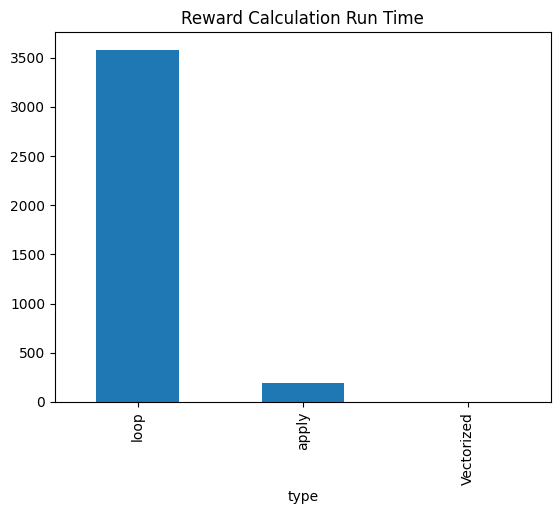

In [46]:
results.set_index('type')['mean'].plot(kind='bar', title='Reward Calculation Run Time')

- https://www.youtube.com/watch?v=SAFmrTnEHLg&list=RDCMUCxladMszXan-jfgzyeIMyvw
- https://www.youtube.com/watch?v=u4_c2LDi4b8